# Unsupervised Learning 
## Task : Customer segmentation Clustering

## 1. Import necessary libraries and modules

In [3]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.cluster import KMeans

# for silhouette analysis
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer # for silhouette visulaization


You may need install `yellowbrick` package, you can do it by uncomment the following cell :

## 2. Load the data

In [4]:
df = pd.read_csv("data\Mall_Customers.csv")
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


## 3. Exploratory Data Analysis

### Exploring the data

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## 4. Data Preprocessing

### Handling the Missing value

In [9]:
df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

### Handling categorical data

Replacing gender with numerical values is essential as KMeans requires numerical input. It allows the algorithm to calculate distances between data points.

In [5]:
df["Gender"].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [6]:
df_modified = pd.get_dummies(df, columns=['Gender'], drop_first = True, dtype = int)
df_modified.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0


In [7]:
# Revoving CustomerID from the training data 
df_modified = df_modified.drop(['CustomerID'], axis = 1)
df_modified.head()

,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,19,15,39,1
1,21,15,81,1
2,20,16,6,0
3,23,16,77,0
4,31,17,40,0


## Step 3: Determining the optimal number of clusters (k)

### 1. The Elbow Method

C:\Users\Utilisateur\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


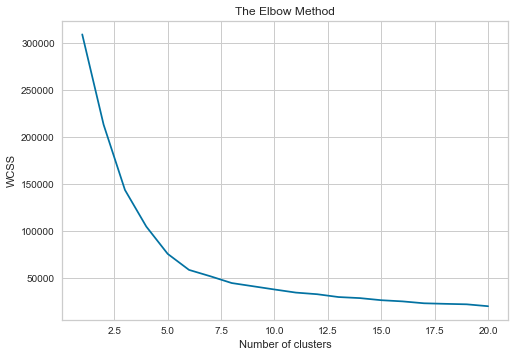

In [10]:
inertia = []  # inertia or Within-Cluster-Sum-of-Squares, lower values are better
for i in range(1, 21):  # Test with number of clusters from 1 to 20
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df_modified)
    inertia.append(kmeans.inertia_)  # inertia_ is the WCSS for the current model

plt.plot(range(1, 21), inertia)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

#### 2. Silhouette analysis

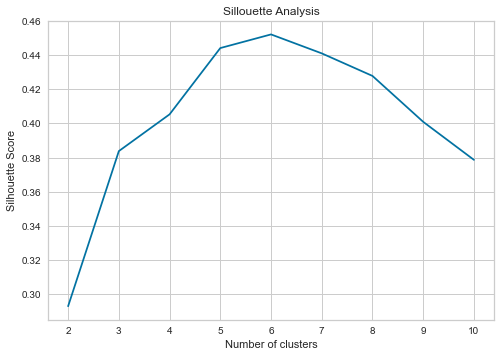

In [16]:
sil = []
kmax = 10

# dissimilarity would not be defined for a single cluster, thus, minimum number of clusters should be 2
for k in range(2, kmax+1):
  kmeans = KMeans(n_clusters = k, random_state = 0).fit(df_modified)
  labels = kmeans.labels_
  sil.append(silhouette_score(df_modified, labels, metric = 'euclidean'))

plt.plot(range(2, 11), sil)
plt.title('Sillouette Analysis')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette Score')
plt.show()

- Sillouette plot of a model with 2 clusters

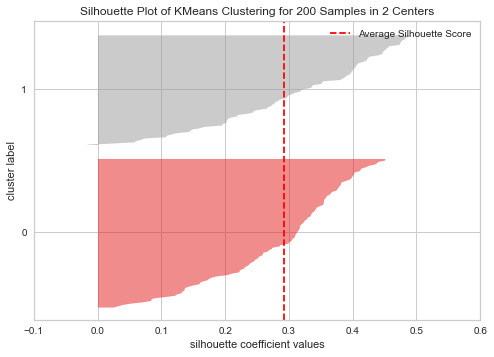

# of clusters: 2
Silhouette score 0.29307334005502633


In [18]:
silh = SilhouetteVisualizer(KMeans(2, random_state = 0))
silh.fit(df_modified)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a model with 4 clusters

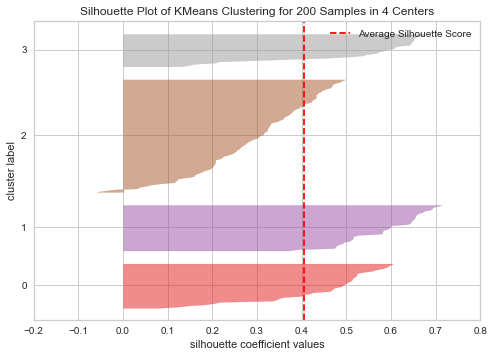

# of clusters: 4
Silhouette score 0.4052954330641215


In [19]:
silh = SilhouetteVisualizer(KMeans(4, random_state = 0))
silh.fit(df_modified)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

- Sillouette plot of a model with 5 cluster

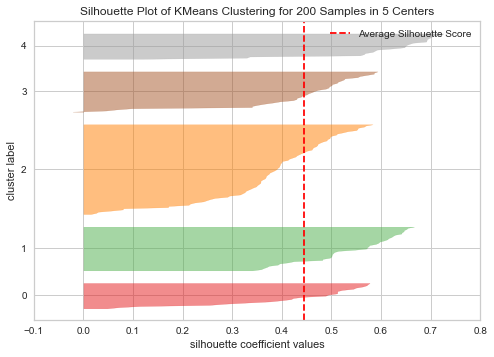

# of clusters: 5
Silhouette score 0.4440669204743008


In [20]:
silh = SilhouetteVisualizer(KMeans(5, random_state = 0))
silh.fit(df_modified)
silh.poof()
print("# of clusters:", silh.n_clusters_)
print("Silhouette score", silh.silhouette_score_)

## Step 4: Apply KMeans & Visualize the clusters 

### Kmeans with 5 clusters

Apply KMeans with the number of clusters where the WCSS starts to decrease more slowly, which is often considered the "elbow" - in this case, 5 clusters.

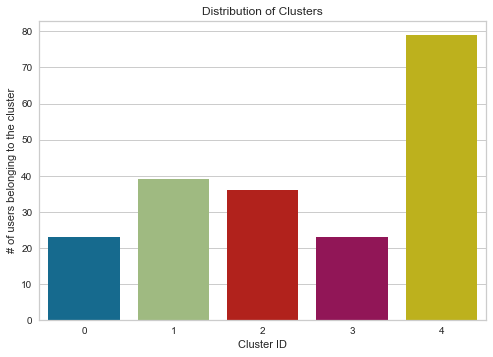

In [52]:
n_clusters = 5

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm and Make clusters
kmeans_clusters = kmeans.fit_predict(df_modified)

# Visualize the partiting of each cluster
sns.countplot(x = kmeans_clusters)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of users belonging to the cluster')
plt.show()

##### Visualize the clusters

Visualize the resulting clusters and their centers to understand the segmentation of data.

In [54]:
clusters_ = pd.DataFrame(kmeans_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,3
2,3,Female,20,16,6,0
3,4,Female,23,16,77,3
4,5,Female,31,17,40,0


- Visualization with spending score and annual income

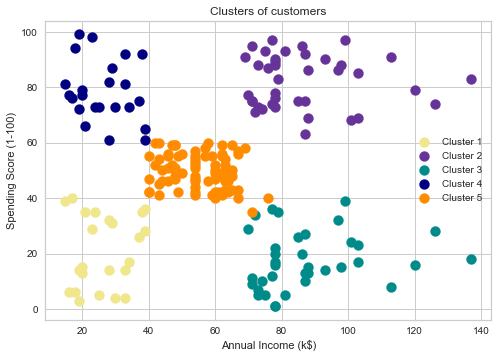

In [55]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')
plt.scatter(df_clusters[df_clusters['clusters'] == 4][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 4][['Spending Score (1-100)']], s = 100, c = 'darkorange', label = 'Cluster 5')


plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Visualization with spending score and age 

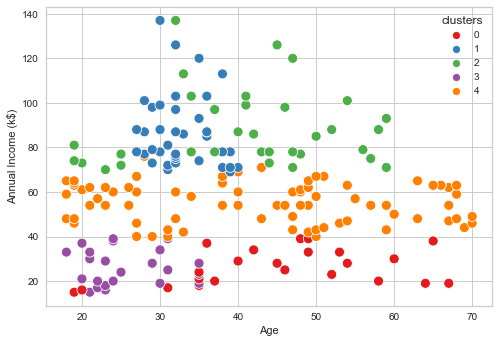

In [56]:
sns.scatterplot(x='Age', y='Spending Score (1-100))', hue='clusters', data=df_clusters, palette='Set1', s = 100)
plt.show()

- Visualization gender across Clusters

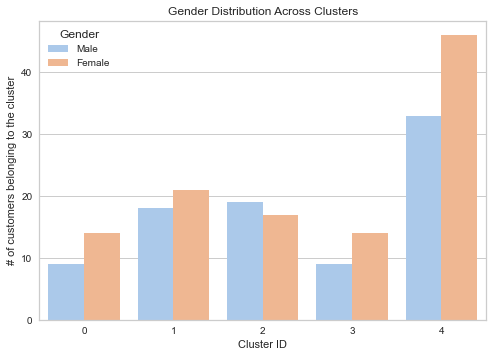

In [57]:
sns.countplot(data = df_clusters, hue = 'Gender', x = 'clusters',palette='pastel')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

### Kmeans with 2 clusters

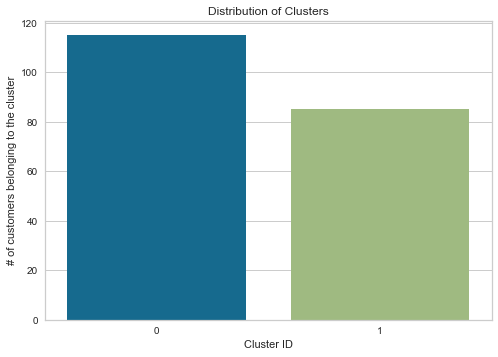

In [58]:
n_clusters = 2

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm and Make clusters
kmeans_clusters = kmeans.fit_predict(df_modified)

# Visualize the partiting of each cluster
sns.countplot(x = kmeans_clusters)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

In [61]:
clusters_ = pd.DataFrame(kmeans_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,0
1,2,Male,21,15,81,1
2,3,Female,20,16,6,0
3,4,Female,23,16,77,1
4,5,Female,31,17,40,0


- Visualization with spending score and annual income

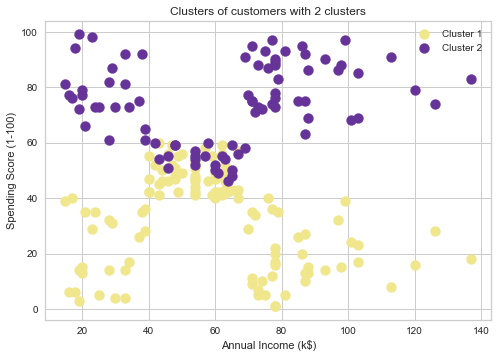

In [62]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')


plt.title('Clusters of customers with 2 clusters')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Visualization with spending score and age

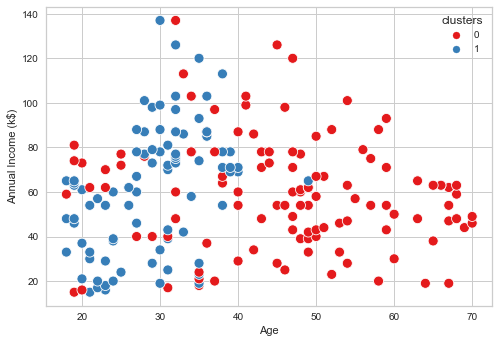

In [63]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=df_clusters, palette='Set1', s = 100)
plt.show()

- Visualization gender across Clusters

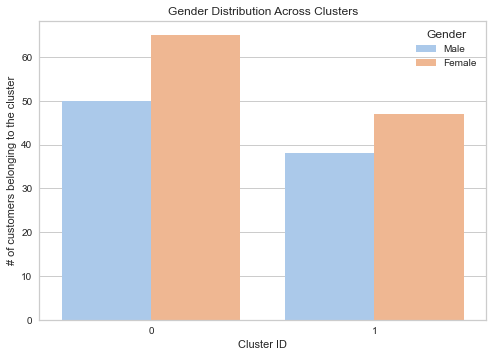

In [64]:
# Visualize the partiting of each cluster
sns.countplot(data = df_clusters, hue = 'Gender', x = 'clusters',palette='pastel')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

### Kmeans with 4 clusters

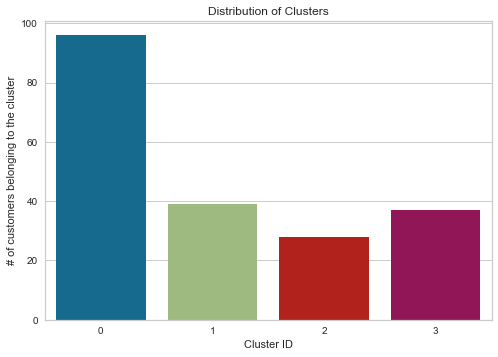

In [65]:
n_clusters = 4

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm and Make clusters
kmeans_clusters = kmeans.fit_predict(df_modified)

# Visualize the partiting of each cluster
sns.countplot(x = kmeans_clusters)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

In [66]:
clusters_ = pd.DataFrame(kmeans_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,2
1,2,Male,21,15,81,2
2,3,Female,20,16,6,0
3,4,Female,23,16,77,2
4,5,Female,31,17,40,0


- Visualization with spending score and annual income

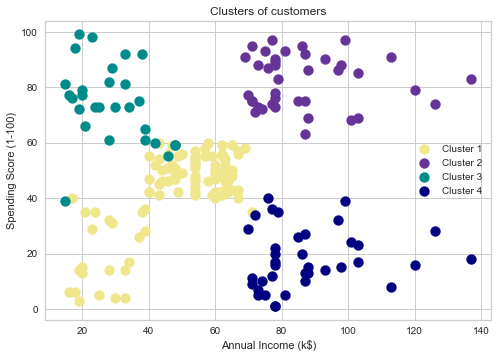

In [67]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')



plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Visualization with spending score and age

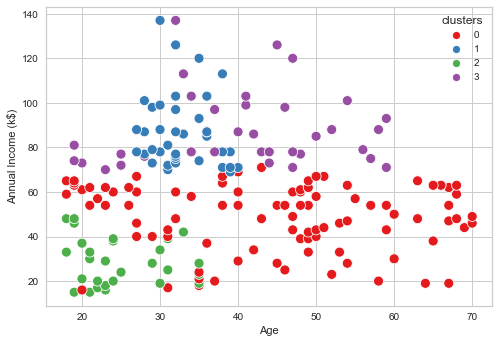

In [68]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=df_clusters, palette='Set1', s = 100)
plt.show()

- Visualization gender across Clusters

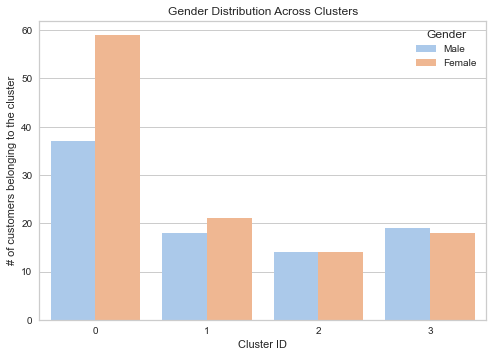

In [69]:
# Visualize the partiting of each cluster
sns.countplot(data = df_clusters, hue = 'Gender', x = 'clusters',palette='pastel')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

### Kmeans with 6 clusters

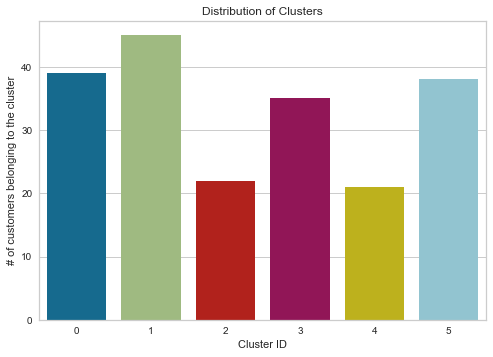

In [70]:
n_clusters = 6

# defining the kmeans function with initialization as k-means++
kmeans = KMeans(n_clusters = n_clusters)

# fitting the k means algorithm and Make clusters
kmeans_clusters = kmeans.fit_predict(df_modified)

# Visualize the partiting of each cluster
sns.countplot(x = kmeans_clusters)
plt.title('Distribution of Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

In [71]:
clusters_ = pd.DataFrame(kmeans_clusters).rename(columns = {0: "clusters"}) # convert to df
# concat the predicted clusters to original data set
df_clusters = pd.concat([df, clusters_], axis = 1) # concat with original data set
df_clusters.head()
# cluster_id is the last column 

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100),clusters
0,1,Male,19,15,39,4
1,2,Male,21,15,81,2
2,3,Female,20,16,6,4
3,4,Female,23,16,77,2
4,5,Female,31,17,40,4


- Visualization with spending score and annual income

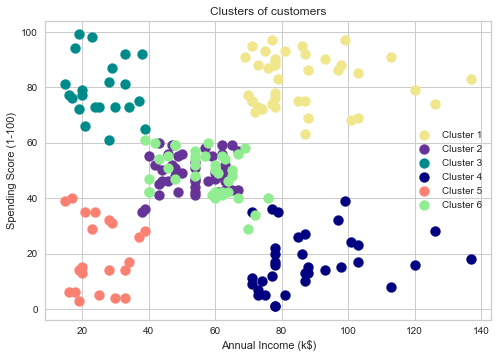

In [76]:
plt.scatter(df_clusters[df_clusters['clusters'] == 0][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 0][['Spending Score (1-100)']], s = 100, c = 'khaki', label = 'Cluster 1')
plt.scatter(df_clusters[df_clusters['clusters'] == 1][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 1][['Spending Score (1-100)']], s = 100, c = 'rebeccapurple', label = 'Cluster 2')
plt.scatter(df_clusters[df_clusters['clusters'] == 2][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 2][['Spending Score (1-100)']], s = 100, c = 'darkcyan', label = 'Cluster 3')
plt.scatter(df_clusters[df_clusters['clusters'] == 3][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 3][['Spending Score (1-100)']], s = 100, c = 'navy', label = 'Cluster 4')
plt.scatter(df_clusters[df_clusters['clusters'] == 4][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 4][['Spending Score (1-100)']], s = 100, c = 'salmon', label = 'Cluster 5')
plt.scatter(df_clusters[df_clusters['clusters'] == 5][['Annual Income (k$)']], df_clusters[df_clusters['clusters'] == 5][['Spending Score (1-100)']], s = 100, c = 'lightgreen', label = 'Cluster 6')



plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

- Visualization with spending score and age

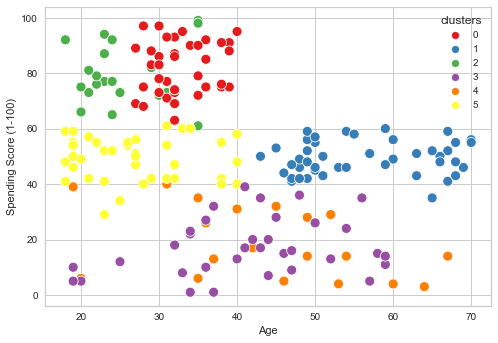

In [77]:
sns.scatterplot(x='Age', y='Spending Score (1-100)', hue='clusters', data=df_clusters, palette='Set1', s = 100)
plt.show()

- Visualization gender across Clusters

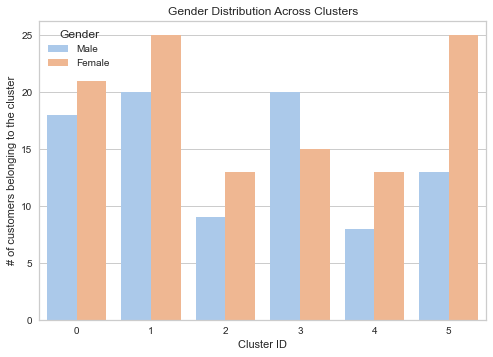

In [78]:
# Visualize the partiting of each cluster
sns.countplot(data = df_clusters, hue = 'Gender', x = 'clusters',palette='pastel')
plt.title('Gender Distribution Across Clusters')
plt.xlabel('Cluster ID')
plt.ylabel('# of customers belonging to the cluster')
plt.show()

## Discussion

Discussion Questions:

1. **Understanding Clusters:** Describe the characteristics of each cluster. What does each cluster represent in terms of customer behavior?
2. **Impact of Gender:** How would including gender in the clustering process potentially impact the clusters?
3. **Business Implications:** How might the mall use this clustering information for marketing or customer engagement strategies?